#             **Movie Ratings and Recommendation Systems**

### Packages

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import numpy as np
import json
import warnings
warnings.filterwarnings('ignore')
import base64
import io
from matplotlib.pyplot import imread
import codecs
from IPython.display import HTML

## 1. Data Exploring and Cleaning

### Reading the Data

In [5]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [6]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [7]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [8]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [9]:
credits['cast'].head()

0    [{"cast_id": 242, "character": "Jake Sully", "...
1    [{"cast_id": 4, "character": "Captain Jack Spa...
2    [{"cast_id": 1, "character": "James Bond", "cr...
3    [{"cast_id": 2, "character": "Bruce Wayne / Ba...
4    [{"cast_id": 5, "character": "John Carter", "c...
Name: cast, dtype: object

In [10]:
credits.describe()

,movie_id
count,4803.000000
mean,57165.484281
std,88694.614033
min,5.000000
25%,9014.500000
50%,14629.000000
75%,58610.500000
max,459488.000000


### Exploring the Data

In [11]:
movies.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [12]:
[features for features in movies.columns if movies[features].isnull().sum()>0]

['homepage', 'overview', 'release_date', 'runtime', 'tagline']

<AxesSubplot:>

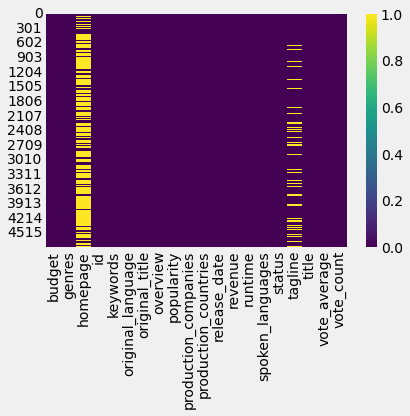

In [13]:
sns.heatmap(movies.isnull(), cmap='viridis')

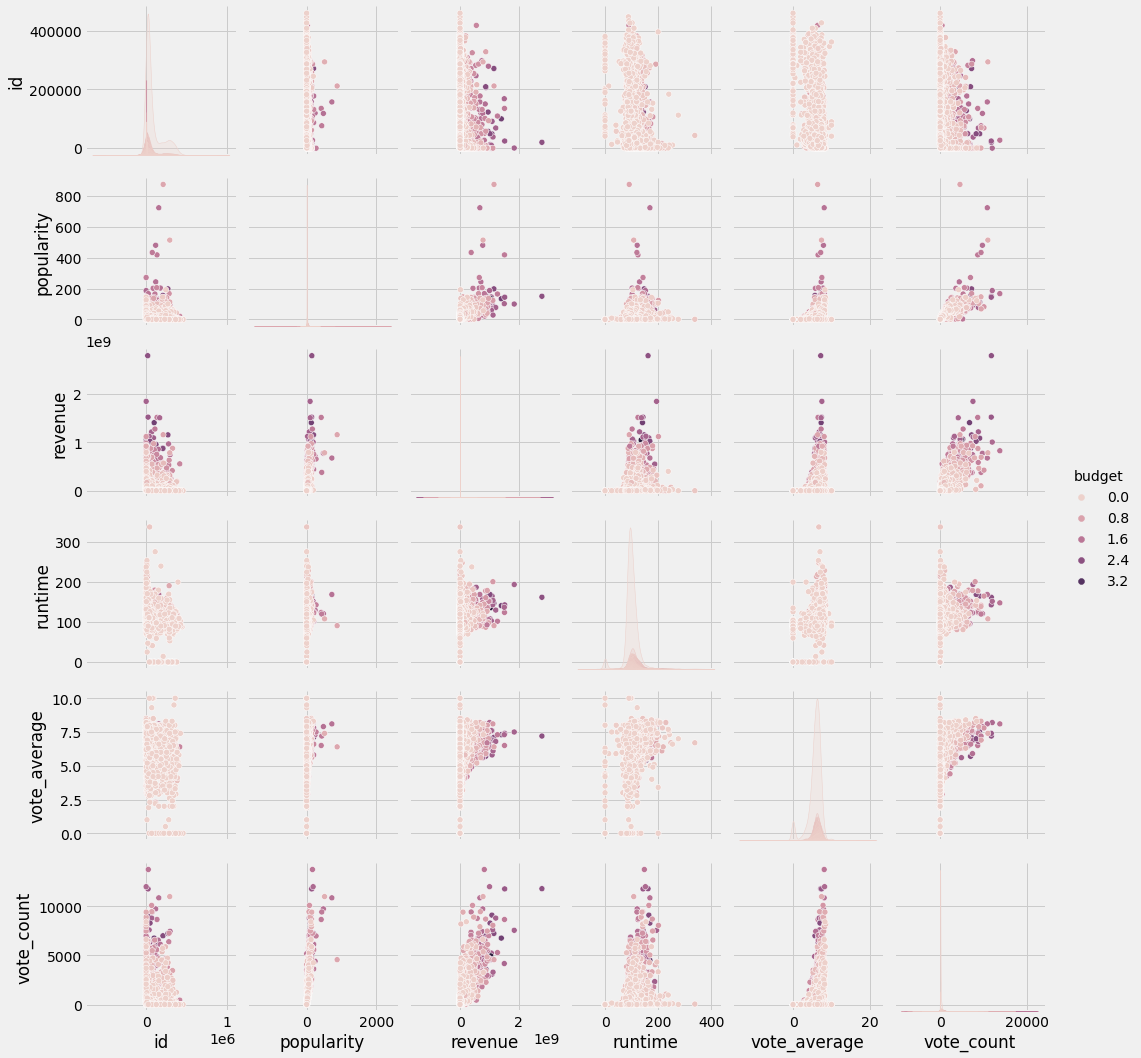

In [12]:
sns.pairplot(movies, hue='budget')

<AxesSubplot:>

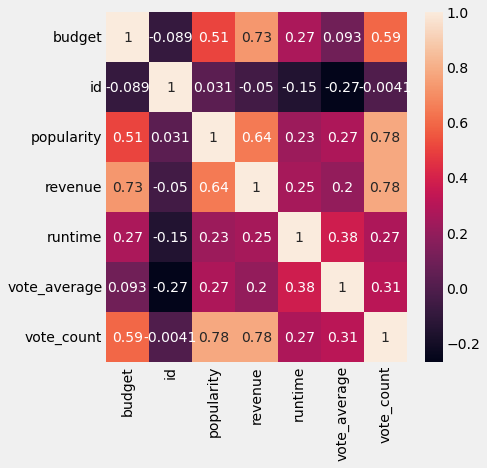

In [14]:
cormap = movies.corr()
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(cormap, annot=True)

<AxesSubplot:xlabel='budget', ylabel='revenue'>

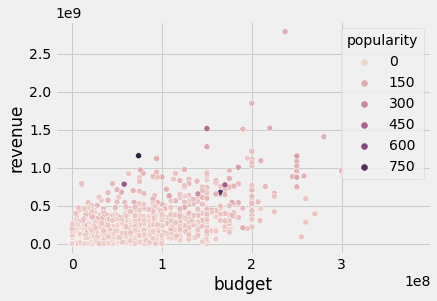

In [15]:
sns.scatterplot(movies['budget'], movies['revenue'], cmap='oranges', hue = movies['popularity'])

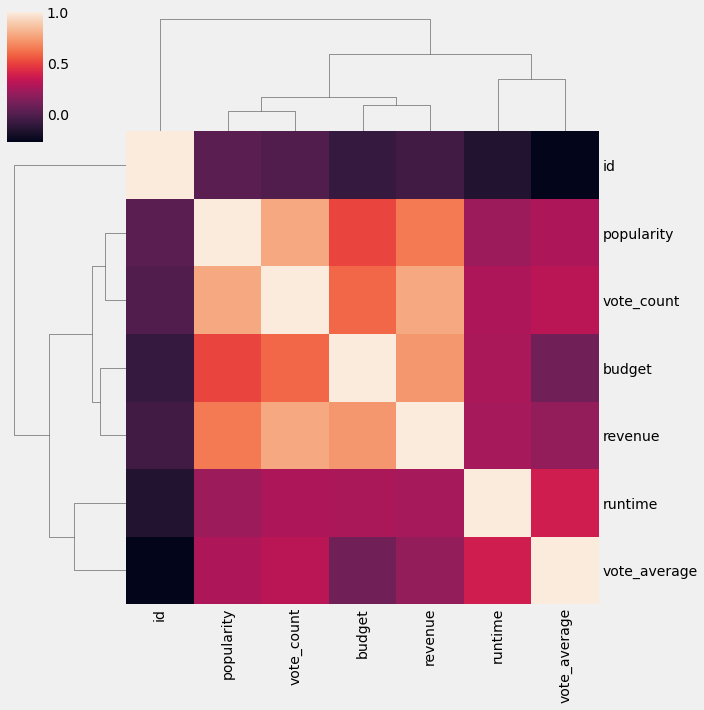

In [16]:
sns.clustermap(movies.corr())

### Converting JSON into strings

In [17]:
# changing the genres column from json to string
movies['genres'] = movies['genres'].apply(json.loads)
for index,i in zip(movies.index,movies['genres']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name'])) # the key 'name' contains the name of the genre
    movies.loc[index,'genres'] = str(list1)

# changing the keywords column from json to string
movies['keywords'] = movies['keywords'].apply(json.loads)
for index,i in zip(movies.index,movies['keywords']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'keywords'] = str(list1)
    
# changing the production_companies column from json to string
movies['production_companies'] = movies['production_companies'].apply(json.loads)
for index,i in zip(movies.index,movies['production_companies']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'production_companies'] = str(list1)

# changing the cast column from json to string
credits['cast'] = credits['cast'].apply(json.loads)
for index,i in zip(credits.index,credits['cast']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    credits.loc[index,'cast'] = str(list1)

# changing the crew column from json to string    
credits['crew'] = credits['crew'].apply(json.loads)
def director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
credits['crew'] = credits['crew'].apply(director)
credits.rename(columns={'crew':'director'},inplace=True)

In [18]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"['Action', 'Adventure', 'Crime']",http://www.sonypictures.com/movies/spectre/,206647,"['spy', 'based on novel', 'secret agent', 'seq...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"['Columbia Pictures', 'Danjaq', 'B24']","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",http://www.thedarkknightrises.com/,49026,"['dc comics', 'crime fighter', 'terrorist', 's...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"['Legendary Pictures', 'Warner Bros.', 'DC Ent...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"['Action', 'Adventure', 'Science Fiction']",http://movies.disney.com/john-carter,49529,"['based on novel', 'mars', 'medallion', 'space...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,['Walt Disney Pictures'],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [19]:
movies.iloc[2,1]

"['Action', 'Adventure', 'Crime']"

In [20]:
credits.head()

,movie_id,title,cast,director
0,19995,Avatar,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",James Cameron
1,285,Pirates of the Caribbean: At World's End,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",Gore Verbinski
2,206647,Spectre,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",Sam Mendes
3,49026,The Dark Knight Rises,"['Christian Bale', 'Michael Caine', 'Gary Oldm...",Christopher Nolan
4,49529,John Carter,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",Andrew Stanton


### Merging two csv files

In [21]:
movies = movies.merge(credits, left_on='id', right_on= 'movie_id', how='left')

In [22]:
movies = movies[['id', 'original_title', 'genres', 'cast', 'vote_average', 'director', 'keywords']]

In [23]:
movies.iloc[2]

id                                                           206647
original_title                                              Spectre
genres                             ['Action', 'Adventure', 'Crime']
cast              ['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...
vote_average                                                    6.3
director                                                 Sam Mendes
keywords          ['spy', 'based on novel', 'secret agent', 'seq...
Name: 2, dtype: object

### Working with the genres column

In [24]:
movies['genres'].head()

0    ['Action', 'Adventure', 'Fantasy', 'Science Fi...
1                   ['Adventure', 'Fantasy', 'Action']
2                     ['Action', 'Adventure', 'Crime']
3             ['Action', 'Crime', 'Drama', 'Thriller']
4           ['Action', 'Adventure', 'Science Fiction']
Name: genres, dtype: object

In [25]:
movies['genres'] = movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'", '').str.split(',')

In [26]:
movies['genres'].head()

0    [Action, Adventure, Fantasy, ScienceFiction]
1                    [Adventure, Fantasy, Action]
2                      [Action, Adventure, Crime]
3                [Action, Crime, Drama, Thriller]
4             [Action, Adventure, ScienceFiction]
Name: genres, dtype: object

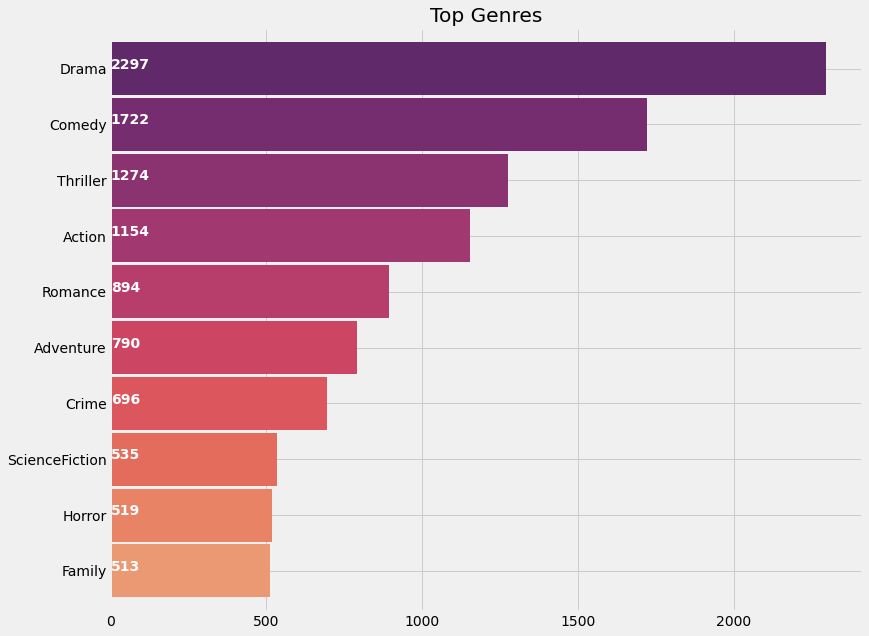

In [27]:
plt.subplots(figsize=(12,10))
list1=[]
for i in movies['genres']:
    list1.extend(i)
    
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.95, color=sns.color_palette('flare',10))

for i,v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values):
    ax.text(0.8, i, v, fontsize=14, color='white', weight='bold')
plt.title('Top Genres')
plt.show()


In [28]:
movies['genres'].head()

0    [Action, Adventure, Fantasy, ScienceFiction]
1                    [Adventure, Fantasy, Action]
2                      [Action, Adventure, Crime]
3                [Action, Crime, Drama, Thriller]
4             [Action, Adventure, ScienceFiction]
Name: genres, dtype: object

#### Generate a list of unique genres

In [29]:
genreList = []
for index, row in movies.iterrows():
    genres = row["genres"]
    
    for genre in genres:
        if genre not in genreList:
            genreList.append(genre)
genreList[:10] #now we have a list with unique genres

['Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'Crime',
 'Drama',
 'Thriller',
 'Animation',
 'Family',
 'Western']

#### Hot enconding for multiple labels

In [30]:
def binary(genre_list):
    binaryList = []
    
    for genre in genreList:
        if genre in genre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [31]:
movies['genres_bin'] = movies['genres'].apply(lambda x: binary(x))
movies['genres_bin'].head()

0    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: genres_bin, dtype: object

### Working with the cast column

In [32]:
movies['cast'].head(2)

0    ['Sam Worthington', 'Zoe Saldana', 'Sigourney ...
1    ['Johnny Depp', 'Orlando Bloom', 'Keira Knight...
Name: cast, dtype: object

In [33]:
movies['cast'] = movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'", '').str.split(',')

In [34]:
movies['cast'].head(2)

0    [SamWorthington, ZoeSaldana, SigourneyWeaver, ...
1    [JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...
Name: cast, dtype: object

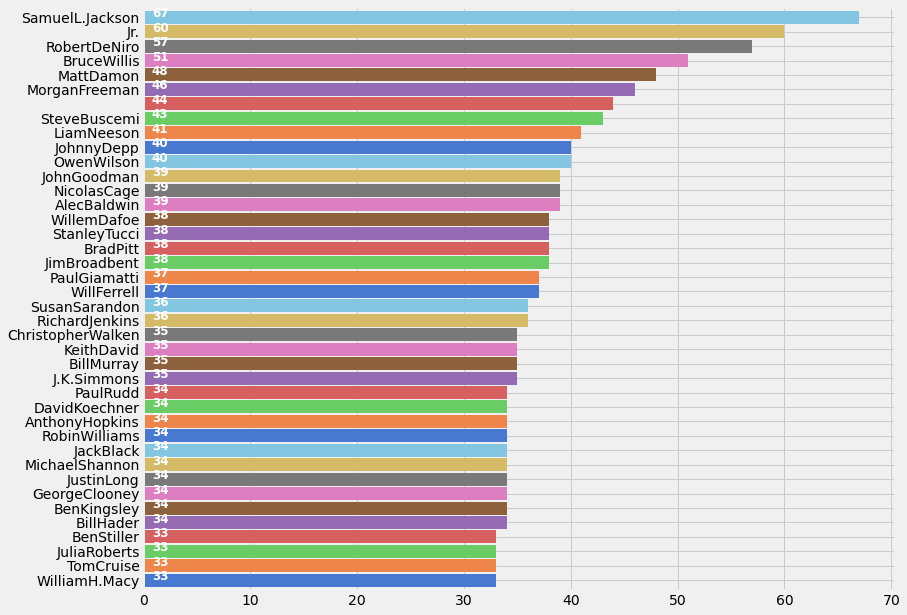

In [35]:
plt.subplots(figsize=(12,10))
list1=[]

for i in movies['cast']:
    list1.extend(i)
    
ax = pd.Series(list1).value_counts()[:40].sort_values(ascending=True).plot.barh(width=0.9, color=sns.color_palette('muted',40))

for i,v in enumerate(pd.Series(list1).value_counts()[:40].sort_values(ascending = True).values):
    ax.text(0.8, i, v, fontsize=12, color='white', weight='bold')

In [36]:
for i,j in zip(movies['cast'], movies.index):
    list2=[]
    list2 = i[:4]
    movies.loc[j, 'cast'] = str(list2)
movies['cast'] = movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.split(',')

In [37]:
str(movies['cast'][1][:4])

"['JohnnyDepp', 'OrlandoBloom', 'KeiraKnightley', 'StellanSkarsgård']"

In [38]:
movies['cast'][1]

['JohnnyDepp', 'OrlandoBloom', 'KeiraKnightley', 'StellanSkarsgård']

In [39]:
castList = []
for index, row in movies.iterrows():
    cast = row["cast"]
    
    for i in cast:
        if i not in castList:
            castList.append(i)

In [40]:
def binary(cast_list):
    binaryList = []
    
    for actor in castList:
        if actor in cast_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
            
    return binaryList

In [41]:
movies['cast_bin'] = movies['cast'].apply(lambda x: binary(x))

In [42]:
movies['cast_bin'].head()

0    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, ...
3    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...
4    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: cast_bin, dtype: object

### Working with the Director column

In [43]:
def xstr(s):
    if s is None:
        return ''
    return str(s)
movies['director'] = movies['director'].apply(xstr)

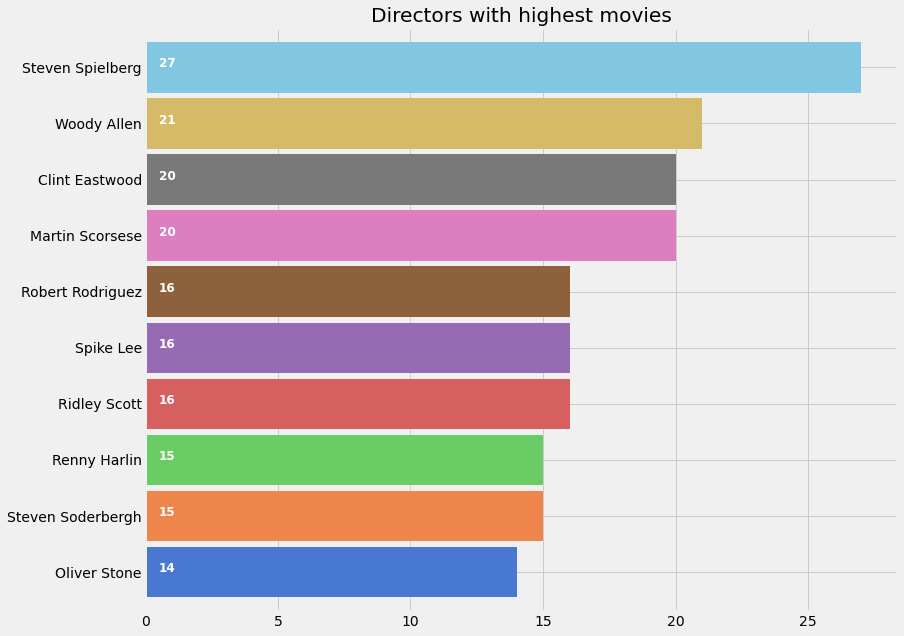

In [44]:
plt.subplots(figsize=(12,10))
ax = movies[movies['director']!=''].director.value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(movies[movies['director']!=''].director.value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.5, i, v,fontsize=12,color='white',weight='bold')
plt.title('Directors with highest movies')
plt.show()

In [45]:
directorList=[]
for i in movies['director']:
    if i not in directorList:
        directorList.append(i)

In [46]:
def binary(director_list):
    binaryList = []  
    for direct in directorList:
        if direct in director_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [47]:
movies['director_bin'] = movies['director'].apply(lambda x: binary(x))
movies.head()

,id,original_title,genres,cast,vote_average,director,keywords,genres_bin,cast_bin,director_bin
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",7.2,James Cameron,"['culture clash', 'future', 'space war', 'spac...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,285,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",6.9,Gore Verbinski,"['ocean', 'drug abuse', 'exotic island', 'east...","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,206647,Spectre,"[Action, Adventure, Crime]","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",6.3,Sam Mendes,"['spy', 'based on novel', 'secret agent', 'seq...","[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","[ChristianBale, MichaelCaine, GaryOldman, Anne...",7.6,Christopher Nolan,"['dc comics', 'crime fighter', 'terrorist', 's...","[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,49529,John Carter,"[Action, Adventure, ScienceFiction]","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",6.1,Andrew Stanton,"['based on novel', 'mars', 'medallion', 'space...","[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [48]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [49]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


### Working with the keyword column

In [50]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords

In [2]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

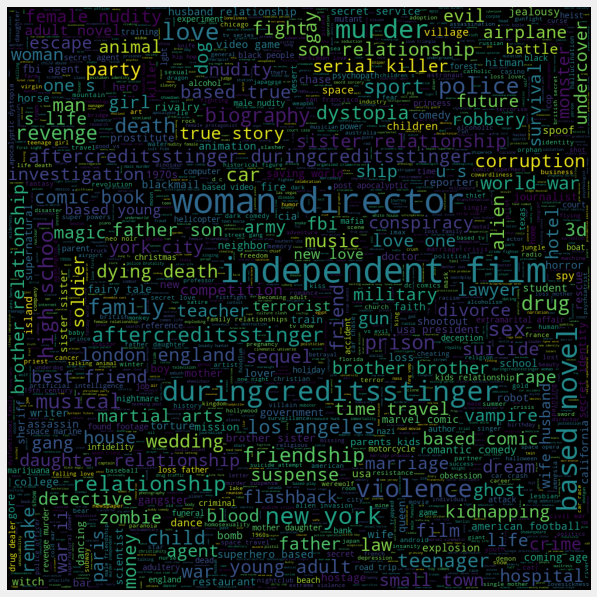

In [51]:
plt.subplots(figsize=(12,12))
stop_words = set(stopwords.words('english'))
stop_words.update(',',';','!','?','.','(',')','$','#','+',':','...',' ','')

words=movies['keywords'].dropna().apply(nltk.word_tokenize)
word=[]
for i in words:
    word.extend(i)
word=pd.Series(word)
word=([i for i in word.str.lower() if i not in stop_words])
wc = WordCloud(background_color="black", max_words=2000, stopwords=STOPWORDS, max_font_size= 60,width=1000,height=1000)
wc.generate(" ".join(word))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [52]:
words_list = []
for index, row in movies.iterrows():
    genres = row["keywords"]
    
    for genre in genres:
        if genre not in words_list:
            words_list.append(genre)

In [53]:
def binary(words):
    binaryList = []
    for genre in words_list:
        if genre in words:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [54]:
movies['words_bin'] = movies['keywords'].apply(lambda x: binary(x))
movies = movies[(movies['vote_average']!=0)] #removing the movies with 0 score and without drector names 
movies = movies[movies['director']!='']

### Similiarity between movies

In [55]:
from scipy import spatial

def Similarity(movieId1, movieId2):
    a = movies.iloc[movieId1]
    b = movies.iloc[movieId2]
    
    genresA = a['genres_bin']
    genresB = b['genres_bin']
    
    genreDistance = spatial.distance.cosine(genresA, genresB)
    
    scoreA = a['cast_bin']
    scoreB = b['cast_bin']
    scoreDistance = spatial.distance.cosine(scoreA, scoreB)
    
    directA = a['director_bin']
    directB = b['director_bin']
    directDistance = spatial.distance.cosine(directA, directB)
    
    wordsA = a['words_bin']
    wordsB = b['words_bin']
    wordsDistance = spatial.distance.cosine(directA, directB)
    return genreDistance + directDistance + scoreDistance + wordsDistance

In [56]:
Similarity(3,160)

2.7958758547680684

In [57]:
print(movies.iloc[3])
print(movies.iloc[160])

id                                                            49026
original_title                                The Dark Knight Rises
genres                             [Action, Crime, Drama, Thriller]
cast              [ChristianBale, MichaelCaine, GaryOldman, Anne...
vote_average                                                    7.6
director                                          Christopher Nolan
keywords          ['dc comics', 'crime fighter', 'terrorist', 's...
genres_bin        [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
cast_bin          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...
director_bin      [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
words_bin         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
Name: 3, dtype: object
id                                                            82702
original_title                           How to Train Your Dragon 2
genres            [Fantasy, Action, Adventure, Animation, Comedy...
cast              [JayBar

In [58]:
new_id = list(range(0,movies.shape[0]))
movies['new_id']=new_id
movies=movies[['original_title','genres','vote_average','genres_bin','cast_bin','new_id','director','director_bin','words_bin']]
movies.head()

,original_title,genres,vote_average,genres_bin,cast_bin,new_id,director,director_bin,words_bin
0,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]",7.2,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,James Cameron,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,Pirates of the Caribbean: At World's End,"[Adventure, Fantasy, Action]",6.9,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...",1,Gore Verbinski,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,Spectre,"[Action, Adventure, Crime]",6.3,"[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, ...",2,Sam Mendes,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, ..."
3,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",7.6,"[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...",3,Christopher Nolan,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,John Carter,"[Action, Adventure, ScienceFiction]",6.1,"[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4,Andrew Stanton,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, ..."


### Score Predictor

In [59]:
import operator

def predict_score(name):
    #name = input('Enter a movie title: ')
    new_movie = movies[movies['original_title'].str.contains(name)].iloc[0].to_frame().T
    print('Selected Movie: ',new_movie.original_title.values[0])
    def getNeighbors(baseMovie, K):
        distances = []
    
        for index, movie in movies.iterrows():
            if movie['new_id'] != baseMovie['new_id'].values[0]:
                dist = Similarity(baseMovie['new_id'].values[0], movie['new_id'])
                distances.append((movie['new_id'], dist))
    
        distances.sort(key=operator.itemgetter(1))
        neighbors = []
    
        for x in range(K):
            neighbors.append(distances[x])
        return neighbors

    K = 10
    avgRating = 0
    neighbors = getNeighbors(new_movie, K)
    
    print('\nRecommended Movies: \n')
    for neighbor in neighbors:
        avgRating = avgRating+movies.iloc[neighbor[0]][2]  
        print( movies.iloc[neighbor[0]][0]+" | Genres: "+str(movies.iloc[neighbor[0]][1]).strip('[]').replace(' ','')+" | Rating: "+str(movies.iloc[neighbor[0]][2]))
    
    print('\n')
    avgRating = avgRating/K
    print('The predicted rating for %s is: %f' %(new_movie['original_title'].values[0],avgRating))
    print('The actual rating for %s is %f' %(new_movie['original_title'].values[0],new_movie['vote_average']))

In [60]:
predict_score('Godfather')

Selected Movie:  The Godfather: Part III

Recommended Movies: 

The Godfather: Part II | Genres: 'Drama','Crime' | Rating: 8.3
The Godfather | Genres: 'Drama','Crime' | Rating: 8.4
The Rainmaker | Genres: 'Drama','Crime','Thriller' | Rating: 6.7
The Outsiders | Genres: 'Crime','Drama' | Rating: 6.9
The Conversation | Genres: 'Crime','Drama','Mystery' | Rating: 7.5
The Cotton Club | Genres: 'Music','Drama','Crime','Romance' | Rating: 6.6
Apocalypse Now | Genres: 'Drama','War' | Rating: 8.0
Twixt | Genres: 'Horror','Thriller' | Rating: 5.0
New York Stories | Genres: 'Comedy','Drama','Romance' | Rating: 6.2
Peggy Sue Got Married | Genres: 'Comedy','Drama','Fantasy','Romance' | Rating: 5.9


The predicted rating for The Godfather: Part III is: 6.950000
The actual rating for The Godfather: Part III is 7.100000


In [61]:
predict_score('Donnie Darko')

Selected Movie:  Donnie Darko

Recommended Movies: 

Southland Tales | Genres: 'Action','Adventure','Comedy','Drama','ScienceFiction','Thriller' | Rating: 5.2
Ghost | Genres: 'Fantasy','Drama','Thriller','Mystery','Romance' | Rating: 6.9
Meet Joe Black | Genres: 'Fantasy','Drama','Mystery' | Rating: 6.9
The Box | Genres: 'Thriller','ScienceFiction' | Rating: 5.4
Lady in the Water | Genres: 'Drama','Thriller','Fantasy','Mystery' | Rating: 5.3
Winter's Tale | Genres: 'Drama','Fantasy','Mystery','Romance' | Rating: 6.0
The Jacket | Genres: 'Drama','Mystery','Thriller','Fantasy' | Rating: 6.8
Zodiac | Genres: 'Crime','Drama','Mystery','Thriller' | Rating: 7.3
Stranger Than Fiction | Genres: 'Comedy','Drama','Fantasy','Romance' | Rating: 7.1
Won't Back Down | Genres: 'Drama' | Rating: 5.8


The predicted rating for Donnie Darko is: 6.270000
The actual rating for Donnie Darko is 7.700000


In [62]:
predict_score('Notting Hill')

Selected Movie:  Notting Hill

Recommended Movies: 

Morning Glory | Genres: 'Comedy','Drama','Romance' | Rating: 6.1
Larry Crowne | Genres: 'Comedy','Romance','Drama' | Rating: 5.7
About a Boy | Genres: 'Drama','Comedy','Romance' | Rating: 6.6
Bridget Jones's Diary | Genres: 'Comedy','Romance','Drama' | Rating: 6.5
Mystic Pizza | Genres: 'Comedy','Drama','Romance' | Rating: 5.9
Four Weddings and a Funeral | Genres: 'Comedy','Drama','Romance' | Rating: 6.6
Runaway Bride | Genres: 'Comedy','Romance' | Rating: 5.7
Mona Lisa Smile | Genres: 'Drama','Romance' | Rating: 6.5
Two Weeks Notice | Genres: 'Romance','Comedy' | Rating: 5.9
Stepmom | Genres: 'Drama','Romance' | Rating: 6.9


The predicted rating for Notting Hill is: 6.240000
The actual rating for Notting Hill is 7.000000


In [63]:
predict_score('Despicable Me')

Selected Movie:  Despicable Me 2

Recommended Movies: 

Despicable Me | Genres: 'Animation','Family' | Rating: 7.1
Over the Hedge | Genres: 'Comedy','Animation','Family' | Rating: 6.3
Alexander and the Terrible, Horrible, No Good, Very Bad Day | Genres: 'Family','Comedy' | Rating: 6.1
Toy Story 3 | Genres: 'Animation','Family','Comedy' | Rating: 7.6
Happy Feet Two | Genres: 'Animation','Comedy','Family' | Rating: 5.8
Monsters, Inc. | Genres: 'Animation','Comedy','Family' | Rating: 7.5
Surf's Up | Genres: 'Animation','Comedy','Family' | Rating: 5.9
Toy Story 2 | Genres: 'Animation','Comedy','Family' | Rating: 7.3
Cloudy with a Chance of Meatballs | Genres: 'Animation','Comedy','Family' | Rating: 6.5
Hotel Transylvania 2 | Genres: 'Animation','Comedy','Family' | Rating: 6.7


The predicted rating for Despicable Me 2 is: 6.680000
The actual rating for Despicable Me 2 is 7.000000
